# Question 10

In this case we have:
$$\frac{dx}{dt}=\sqrt{\frac{2(E-V(x))}{m}}$$
implying:
$$dt = \frac{dx}{\sqrt{\frac{2(E-V(x))}{m}}}$$
and integrating we have:
$$\int_{0}^{\frac{T}{4}} dt=\int_{a}^{0}\frac{dx}{\sqrt{\frac{2(E-V(x))}{m}}}$$
giving us:(E=V(a))
$$T=4\int_{a}^{0}\frac{dx}{\sqrt{\frac{2(V(a)-V(x))}{m}}}$$


Text(0, 0.5, 'time(s)')

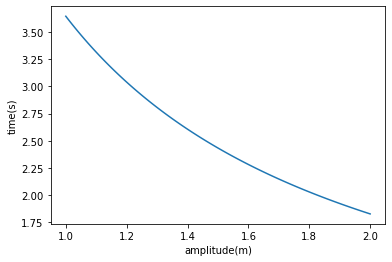

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

from numpy import ones,copy,cos,tan,pi,linspace

def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w


def f(x,a):
    return 1/(math.sqrt(2*(a**4-x**4)))
    
    
N=20
def int_a(a,N):
    x,w=gaussxwab(N,0,a)
    val=0
    for i in range(N):
        val+=(w[i])*(f(x[i],a))
    return val
        
a_x=np.linspace(1,2,100)
time=[]
for i in range(0, 100):
    time.append(4*int_a(a_x[i],N))
    
plt.plot(a_x, time, label='')
plt.xlabel('amplitude(m)')
plt.ylabel('time(s)')
    


Text(0, 0.5, 'time(s)')

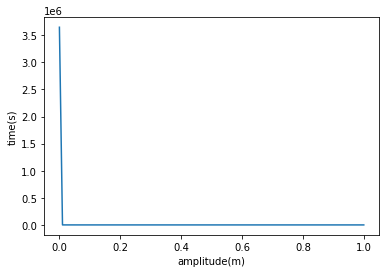

In [5]:
#we see teh behaviour when the amplitude approaches 0, 

a_x=np.linspace(1e-6,1,100)
time=[]
for i in range(0, 100):
    time.append(4*int_a(a_x[i],N))
    
plt.plot(a_x, time, label='')
plt.xlabel('amplitude(m)')
plt.ylabel('time(s)')

For $V=x^2$, the derivative tends to 0,near 0 ampitude, but the double derivative is not 0. It is like:
$$F=\frac{dV}{dx}=\frac{dV}{dx}|_{x=0}+(x)\frac{d^2V}{dx^2}|_{x=0}\approx 2x$$, this makes $F\propto x$ even near equal to 0.
Now, in case of higher powers like $x^4$, we have 1st, second and third derivative to be 0 too, making the descent slower. In a more analytical term:
$$T=\int_{a}^{0}\frac{dx}{\sqrt{\frac{2(V(a)-V(x))}{m}}}$$
Now, for a very small we can approximate $a\approx x$ thoughout the oscilation. Neglecting constant terms(these do not affect the behaviour of the limit/diverging nature of the function.) We have :
$$f(x)=\int_{a}^0 (V(a)-V(x))^{-\frac{1}{2}}dx=\int_{a}^{0}(a^4-x^4)^{-\frac{1}{2}}dx \\ \approx \int_{a}^0 (4x^3(x-a))^{-\frac{1}{2}}dx \sim \int_{a}^0 (a^3(a))^{-\frac{1}{2}}dx \approx \frac{a}{a^2} \sim \mathcal{O}(\frac{1}{a})$$ which diverges as a approaches 0. For, $V=x^2$, the asymptomatic behaviour will approach a constant, $\mathcal{O}(1)$. 